In [1]:
# import libraries
import os
import time
import sys
import pandas as pd
import numpy as np

from scipy.linalg import cholesky, eigvals
from scipy import stats
from scipy.optimize import minimize

from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(r"C:\Users\WANGLIN CAI\fintech545")
import RiskManagement as RM

In [2]:
# change working directory
os.chdir(r'C:\Users\WANGLIN CAI\fintech545\Week05')

In [3]:
# q1
problem1 = pd.read_csv('problem1.csv')

In [4]:
problem1.head(5)

,x
0,-0.002665
1,-0.045128
2,0.053635
3,0.010450
4,-0.016284


In [5]:
def cal_VaR_ES_norm(returns, n=10000, alpha=0.05):
    # to get VaR, ES in one function
    
    # get basic stats
    mu = returns.mean()
    sigma = returns.std()
    simu_returns = np.random.normal(mu, sigma, n)
    simu_returns.sort()
    
    n = alpha * simu_returns.size
    
    # if n is not an interger, then:
    iup = int(np.ceil(n))
    idn = int(np.floor(n))
    VaR = (simu_returns[iup] + simu_returns[idn]) / 2

    ES = np.mean(simu_returns[0:idn])

    return -VaR, -ES, simu_returns

In [6]:
def MLE_t(params, returns):
    # provide parameters of df, mean and sd
    df, loc, scale = params
    
    # calculate log likelihood function
    neg_LL = -1 * np.sum(stats.t.logpdf(returns, df=df, loc=loc, scale=scale))
    return(neg_LL)


def cal_VaR_MLE_t(returns, n=10000, alpha=0.05):
    
    mu = returns.mean()[0]
    sigma = returns.std()[0]
    # add constraints to the optimizations
    constraints = [
        {'type': 'ineq', 'fun': lambda x: x[0] - 1},
        {'type': 'ineq', 'fun': lambda x: x[2]}
    ]
    
    # optimization
    res = minimize(MLE_t, x0=[10.0, mu, sigma], args=(returns,), constraints=constraints)
    
    # get the optimized variables
    df, loc, scale = res.x
    print(df)
    # t distribution VaR, ES
    simu_returns = stats.t.rvs(df, loc=loc, scale=scale, size=n)
    simu_returns.sort()
    n = alpha * simu_returns.size
    iup = int(np.ceil(n))
    idn = int(np.floor(n))
    VaR = (simu_returns[iup] + simu_returns[idn]) / 2

    ES = np.mean(simu_returns[0:idn])

    return -VaR, -ES, simu_returns

In [7]:
VaR_norm, ES_norm, simu_norm = cal_VaR_ES_norm(problem1)
VaR_t, ES_t, simu_t = cal_VaR_MLE_t(problem1)
print("VaR_norm is {}".format(VaR_norm))
print("ES_norm is {}".format(ES_norm))
print("VaR_t is {}".format(VaR_t))
print("ES_t is {}".format(ES_t))

4.250997152846075
VaR_norm is 0.08062459749954634
ES_norm is 0.10220651176450801
VaR_t is 0.0751262441147022
ES_t is 0.11247629861546375


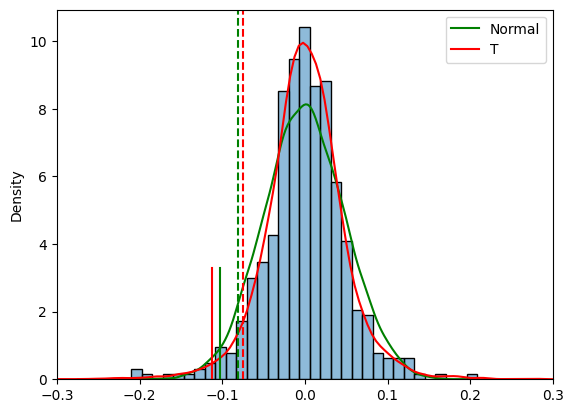

In [8]:
plt.figure()
norm_color = "green"
t_color = "red"

# plot histogram and 2 distributions PDFs
sns.histplot(problem1, stat="density")
sns.kdeplot(simu_norm, color=norm_color, label='Normal')
sns.kdeplot(simu_t, color=t_color, label='T')

# overlay the VaR and ES on existing plot
plt.axvline(- VaR_norm, color=norm_color, linestyle='--')
plt.axvline(- VaR_t, color=t_color, linestyle='--')
plt.axvline(- ES_norm, 0, 0.3, color=norm_color)
plt.axvline(- ES_t, 0, 0.3, color=t_color)

plt.xlim(-0.3, 0.3)
plt.legend()

plt.show()

In [9]:
# q2

In [10]:
DP = pd.read_csv("DailyPrices.csv")

# Calculate return
DP_return = RM.return_calculate(DP)
DP_return.drop('Date', axis=1, inplace=True)

C:\Users\WANGLIN CAI\fintech545\RiskManagement\return_calculate.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[vars[i]] = p2[:,i]


In [40]:
DP_return

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
1,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
2,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,-0.001739,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025984
3,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,-0.006653,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030857,-0.031925,-0.033380,-0.028763
4,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,0.003987,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
5,-0.010732,-0.017812,-0.000729,-0.015753,-0.041366,-0.004521,-0.008163,-0.019790,-0.010659,-0.002033,...,0.009494,0.007121,-0.008891,0.003243,-0.001147,-0.000673,0.008342,-0.037654,-0.002246,-0.013605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.010629,0.024400,-0.023621,-0.084315,0.009083,-0.027474,-0.032904,-0.011866,-0.028053,-0.010742,...,-0.004694,-0.011251,-0.001277,-0.002677,0.038211,0.004134,0.002336,-0.008916,-0.005954,0.001617
245,-0.006111,-0.017929,-0.006116,-0.011703,0.025161,-0.017942,-0.016632,-0.002520,-0.000521,-0.000259,...,-0.014451,0.003945,0.001066,-0.007102,0.022012,0.021826,-0.041181,0.005106,-0.009782,-0.004595
246,0.013079,0.019245,0.042022,-0.000685,0.010526,0.046064,0.044167,0.029883,0.051401,0.014720,...,-0.000368,-0.016473,-0.008518,0.019544,-0.003590,-0.001641,0.003573,0.001451,0.008669,-0.003618
247,-0.010935,-0.017653,-0.003102,-0.020174,0.022763,-0.076830,-0.074417,-0.042741,0.001443,-0.014346,...,-0.008469,-0.004456,-0.001289,-0.018009,-0.004416,0.002819,-0.015526,0.004106,-0.015391,0.009363


In [11]:
# 1 covariance estimation techniques

In [12]:
ew_cov = RM.exp_weighted_cov(DP_return)
pd.DataFrame(ew_cov)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000155,0.000210,0.000235,0.000285,0.000279,0.000279,0.000284,0.000331,0.000368,0.000125,...,0.000172,0.000082,0.000052,0.000197,0.000042,0.000034,0.000171,0.000209,0.000160,0.000063
1,0.000210,0.000421,0.000321,0.000329,0.000526,0.000417,0.000417,0.000563,0.000527,0.000152,...,0.000182,0.000084,0.000039,0.000286,0.000087,0.000035,0.000222,0.000286,0.000201,0.000064
2,0.000235,0.000321,0.000499,0.000505,0.000438,0.000521,0.000529,0.000664,0.000610,0.000166,...,0.000220,0.000084,0.000042,0.000291,-0.000003,0.000032,0.000224,0.000297,0.000192,0.000038
3,0.000285,0.000329,0.000505,0.000939,0.000542,0.000657,0.000671,0.000923,0.000696,0.000200,...,0.000277,0.000128,0.000050,0.000336,-0.000115,-0.000016,0.000296,0.000436,0.000266,0.000039
4,0.000279,0.000526,0.000438,0.000542,0.002369,0.000434,0.000444,0.000636,0.001212,0.000119,...,0.000292,0.000079,0.000004,0.000381,0.000004,0.000066,0.000252,0.000666,0.000179,0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000034,0.000035,0.000032,-0.000016,0.000066,-0.000019,-0.000017,-0.000049,0.000013,0.000046,...,0.000048,0.000044,0.000033,0.000022,0.000087,0.000163,-0.000025,0.000052,-0.000003,0.000064
96,0.000171,0.000222,0.000224,0.000296,0.000252,0.000307,0.000307,0.000380,0.000468,0.000106,...,0.000168,0.000131,0.000194,0.000257,0.000034,-0.000025,0.000531,0.000186,0.000205,0.000082
97,0.000209,0.000286,0.000297,0.000436,0.000666,0.000325,0.000330,0.000615,0.000536,0.000165,...,0.000230,0.000097,0.000028,0.000250,0.000041,0.000052,0.000186,0.000716,0.000213,0.000064
98,0.000160,0.000201,0.000192,0.000266,0.000179,0.000279,0.000284,0.000361,0.000300,0.000142,...,0.000245,0.000092,0.000073,0.000186,0.000048,-0.000003,0.000205,0.000213,0.000325,0.000072


In [13]:
# 2 Non PSD fixes for correlation matrices

In [14]:
n = 500
sigma = np.full((n,n),0.9)
for i in range(n):
    sigma[i,i]=1.0
sigma[0,1] = 0.7357
sigma[1,0] = 0.7357

In [43]:
sigma

array([[1.    , 0.7357, 0.9   , ..., 0.9   , 0.9   , 0.9   ],
       [0.7357, 1.    , 0.9   , ..., 0.9   , 0.9   , 0.9   ],
       [0.9   , 0.9   , 1.    , ..., 0.9   , 0.9   , 0.9   ],
       ...,
       [0.9   , 0.9   , 0.9   , ..., 1.    , 0.9   , 0.9   ],
       [0.9   , 0.9   , 0.9   , ..., 0.9   , 1.    , 0.9   ],
       [0.9   , 0.9   , 0.9   , ..., 0.9   , 0.9   , 1.    ]])

In [15]:
print("Sigma: ", RM.is_psd(sigma))
print("Sigma fixed with near_psd(): ", RM.is_psd(RM.near_PSD(sigma)))
print("Sigma fixed with Higham_psd(): ", RM.is_psd(RM.Higham(sigma)))

Sigma:  False
Sigma fixed with near_psd():  True
Sigma fixed with Higham_psd():  True


In [42]:
RM.near_PSD(sigma)

array([[1.        , 0.74381947, 0.88594237, ..., 0.88594237, 0.88594237,
        0.88594237],
       [0.74381947, 1.        , 0.88594237, ..., 0.88594237, 0.88594237,
        0.88594237],
       [0.88594237, 0.88594237, 1.        , ..., 0.90000005, 0.90000005,
        0.90000005],
       ...,
       [0.88594237, 0.88594237, 0.90000005, ..., 1.        , 0.90000005,
        0.90000005],
       [0.88594237, 0.88594237, 0.90000005, ..., 0.90000005, 1.        ,
        0.90000005],
       [0.88594237, 0.88594237, 0.90000005, ..., 0.90000005, 0.90000005,
        1.        ]])

In [16]:
# 3 Simulation Methods

In [17]:
pd.DataFrame(np.cov(RM.direct_simulation(ew_cov).T))

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000157,0.000212,0.000236,0.000289,0.000282,0.000283,0.000288,0.000338,0.000371,0.000126,...,0.000173,0.000083,0.000053,0.000199,0.000043,0.000034,0.000174,0.000212,0.000163,0.000063
1,0.000212,0.000423,0.000324,0.000335,0.000529,0.000424,0.000423,0.000569,0.000529,0.000153,...,0.000185,0.000086,0.000041,0.000288,0.000088,0.000036,0.000226,0.000289,0.000205,0.000064
2,0.000236,0.000324,0.000502,0.000511,0.000438,0.000530,0.000538,0.000674,0.000609,0.000168,...,0.000222,0.000085,0.000043,0.000292,-0.000003,0.000033,0.000227,0.000298,0.000195,0.000038
3,0.000289,0.000335,0.000511,0.000948,0.000542,0.000669,0.000684,0.000944,0.000701,0.000204,...,0.000281,0.000132,0.000054,0.000340,-0.000114,-0.000014,0.000304,0.000439,0.000272,0.000040
4,0.000282,0.000529,0.000438,0.000542,0.002348,0.000443,0.000452,0.000635,0.001208,0.000119,...,0.000290,0.000082,0.000006,0.000387,0.000008,0.000069,0.000262,0.000663,0.000184,0.000077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000034,0.000036,0.000033,-0.000014,0.000069,-0.000018,-0.000015,-0.000048,0.000014,0.000046,...,0.000047,0.000043,0.000033,0.000023,0.000087,0.000163,-0.000024,0.000054,-0.000004,0.000065
96,0.000174,0.000226,0.000227,0.000304,0.000262,0.000313,0.000313,0.000386,0.000474,0.000108,...,0.000173,0.000135,0.000195,0.000260,0.000033,-0.000024,0.000538,0.000189,0.000211,0.000084
97,0.000212,0.000289,0.000298,0.000439,0.000663,0.000328,0.000333,0.000616,0.000537,0.000168,...,0.000232,0.000099,0.000030,0.000253,0.000047,0.000054,0.000189,0.000721,0.000217,0.000068
98,0.000163,0.000205,0.000195,0.000272,0.000184,0.000284,0.000290,0.000369,0.000307,0.000144,...,0.000248,0.000094,0.000074,0.000190,0.000048,-0.000004,0.000211,0.000217,0.000329,0.000072


In [18]:
pd.DataFrame(np.cov(RM.simulate_pca(ew_cov, 25000)))

Simulating with 100 PC Factors: 100.00% total variance explained


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000157,0.000212,0.000237,0.000289,0.000288,0.000283,0.000288,0.000336,0.000375,0.000126,...,0.000175,0.000084,0.000055,0.000200,0.000043,0.000034,0.000175,0.000212,0.000163,0.000064
1,0.000212,0.000422,0.000323,0.000332,0.000531,0.000423,0.000422,0.000571,0.000532,0.000154,...,0.000185,0.000085,0.000042,0.000289,0.000086,0.000035,0.000226,0.000288,0.000203,0.000064
2,0.000237,0.000323,0.000499,0.000507,0.000448,0.000527,0.000535,0.000671,0.000617,0.000167,...,0.000222,0.000086,0.000046,0.000295,-0.000002,0.000032,0.000232,0.000301,0.000197,0.000038
3,0.000289,0.000332,0.000507,0.000945,0.000561,0.000668,0.000683,0.000933,0.000709,0.000203,...,0.000284,0.000131,0.000056,0.000341,-0.000113,-0.000015,0.000306,0.000442,0.000273,0.000042
4,0.000288,0.000531,0.000448,0.000561,0.002368,0.000453,0.000463,0.000653,0.001224,0.000126,...,0.000305,0.000082,0.000013,0.000392,-0.000001,0.000067,0.000267,0.000674,0.000187,0.000080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000034,0.000035,0.000032,-0.000015,0.000067,-0.000020,-0.000017,-0.000051,0.000015,0.000047,...,0.000049,0.000044,0.000034,0.000025,0.000088,0.000164,-0.000024,0.000054,-0.000002,0.000065
96,0.000175,0.000226,0.000232,0.000306,0.000267,0.000315,0.000316,0.000390,0.000480,0.000107,...,0.000173,0.000135,0.000196,0.000261,0.000034,-0.000024,0.000538,0.000188,0.000208,0.000083
97,0.000212,0.000288,0.000301,0.000442,0.000674,0.000332,0.000337,0.000616,0.000541,0.000166,...,0.000235,0.000096,0.000032,0.000254,0.000041,0.000054,0.000188,0.000716,0.000217,0.000066
98,0.000163,0.000203,0.000197,0.000273,0.000187,0.000287,0.000292,0.000370,0.000305,0.000144,...,0.000249,0.000094,0.000074,0.000188,0.000048,-0.000002,0.000208,0.000217,0.000328,0.000073


In [44]:
pd.DataFrame(np.cov(RM.simulate_pca(ew_cov, 25000, nval = 10)))

Simulating with 10 PC Factors: 77.18% total variance explained


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000156,0.000208,0.000232,0.000287,0.000277,0.000282,0.000287,0.000340,0.000371,0.000125,...,0.000175,0.000083,0.000050,0.000201,4.213701e-05,0.000033,0.000173,0.000209,0.000162,0.000062
1,0.000208,0.000338,0.000322,0.000342,0.000539,0.000425,0.000428,0.000585,0.000549,0.000151,...,0.000220,0.000095,0.000057,0.000283,7.753302e-05,0.000041,0.000234,0.000260,0.000200,0.000059
2,0.000232,0.000322,0.000421,0.000506,0.000459,0.000522,0.000530,0.000670,0.000587,0.000167,...,0.000204,0.000094,0.000042,0.000302,-6.445492e-06,0.000031,0.000240,0.000301,0.000202,0.000044
3,0.000287,0.000342,0.000506,0.000829,0.000516,0.000674,0.000687,0.000931,0.000714,0.000211,...,0.000301,0.000125,0.000033,0.000349,-1.098082e-04,-0.000015,0.000297,0.000454,0.000290,0.000032
4,0.000277,0.000539,0.000459,0.000516,0.002327,0.000420,0.000426,0.000638,0.001266,0.000110,...,0.000284,0.000055,-0.000023,0.000387,-3.715293e-07,0.000064,0.000241,0.000696,0.000167,0.000068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000033,0.000041,0.000031,-0.000015,0.000064,-0.000034,-0.000031,-0.000050,0.000029,0.000044,...,0.000051,0.000037,0.000013,0.000024,7.979733e-05,0.000079,-0.000041,0.000053,0.000015,0.000065
96,0.000173,0.000234,0.000240,0.000297,0.000241,0.000306,0.000308,0.000366,0.000494,0.000118,...,0.000195,0.000115,0.000126,0.000273,3.226884e-05,-0.000041,0.000402,0.000194,0.000211,0.000057
97,0.000209,0.000260,0.000301,0.000454,0.000696,0.000305,0.000312,0.000651,0.000548,0.000162,...,0.000244,0.000115,0.000044,0.000235,2.518137e-05,0.000053,0.000194,0.000621,0.000223,0.000075
98,0.000162,0.000200,0.000202,0.000290,0.000167,0.000286,0.000290,0.000362,0.000296,0.000140,...,0.000224,0.000090,0.000059,0.000181,5.040029e-05,0.000015,0.000211,0.000223,0.000238,0.000073


In [45]:
pd.DataFrame(np.cov(RM.simulate_pca(ew_cov, 25000, nval = 2)))

Simulating with 2 PC Factors: 54.29% total variance explained


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000150,0.000197,0.000217,0.000275,0.000282,0.000261,0.000266,0.000312,0.000381,0.000119,...,0.000169,0.000080,0.000053,0.000201,3.518816e-05,0.000024,0.000182,0.000207,0.000156,0.000059
1,0.000197,0.000270,0.000305,0.000400,0.000420,0.000385,0.000392,0.000516,0.000524,0.000147,...,0.000213,0.000094,0.000058,0.000265,1.765132e-05,0.000016,0.000244,0.000290,0.000203,0.000055
2,0.000217,0.000305,0.000349,0.000467,0.000498,0.000455,0.000461,0.000646,0.000593,0.000155,...,0.000226,0.000095,0.000055,0.000292,-2.230851e-06,0.000005,0.000272,0.000331,0.000221,0.000044
3,0.000275,0.000400,0.000467,0.000643,0.000696,0.000632,0.000640,0.000962,0.000781,0.000183,...,0.000273,0.000104,0.000053,0.000370,-4.217745e-05,-0.000016,0.000350,0.000443,0.000275,0.000024
4,0.000282,0.000420,0.000498,0.000696,0.000762,0.000689,0.000697,0.001091,0.000823,0.000179,...,0.000270,0.000096,0.000043,0.000380,-7.197331e-05,-0.000032,0.000363,0.000471,0.000279,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000024,0.000016,0.000005,-0.000016,-0.000032,-0.000025,-0.000024,-0.000121,0.000027,0.000035,...,0.000044,0.000032,0.000029,0.000032,5.329586e-05,0.000031,0.000023,0.000007,0.000031,0.000048
96,0.000182,0.000244,0.000272,0.000350,0.000363,0.000335,0.000341,0.000423,0.000473,0.000141,...,0.000202,0.000092,0.000060,0.000244,3.096978e-05,0.000023,0.000223,0.000259,0.000189,0.000063
97,0.000207,0.000290,0.000331,0.000443,0.000471,0.000430,0.000436,0.000607,0.000564,0.000149,...,0.000217,0.000092,0.000054,0.000279,7.745234e-07,0.000007,0.000259,0.000315,0.000211,0.000044
98,0.000156,0.000203,0.000221,0.000275,0.000279,0.000259,0.000265,0.000292,0.000390,0.000127,...,0.000179,0.000087,0.000060,0.000209,4.584271e-05,0.000031,0.000189,0.000211,0.000164,0.000069


In [19]:
#1. Pearson correlation and var
p_cov_var = RM.p_corr_var_f(problem1)
p_cov_var

array(0.00239253)

In [20]:
#2. Pearson correlation and EW variance
p_corr_ew_var = RM.p_corr_ew_var_f(problem1)
p_corr_ew_var

array([[0.00301315]])

In [21]:
#3. EW(cov+corr) is exp_weighted_cov(input, lambda_)
ew_corr_cov = RM.exp_weighted_cov(problem1)
ew_corr_cov

array([[0.00301315]])

In [22]:
#4. EW Corr +Var
ew_corr_p_var = RM.ew_corr_p_var_f(problem1)
ew_corr_p_var

array([[0.00238774]])

In [23]:
# 4/5 VaR and ES calculation methods

In [24]:
RM.cal_VaR_ES_norm(problem1)

(0.0801701797195414,
 0.10118919638373398,
 array([-0.18526643, -0.17391576, -0.1696489 , ...,  0.17157298,
         0.17488806,  0.20220341]))

In [55]:
RM.cal_VaR_ES_ew_norm(problem1)

(0.09096711648746494,
 0.11130460050658254,
 array([-0.18909483, -0.18110295, -0.17927724, ...,  0.17998839,
         0.1843606 ,  0.18971481]))

In [25]:
RM.cal_VaR_ES_MLE_t(problem1)

(0.07851107644018746,
 0.11583688492893608,
 array([-0.44336944, -0.43078927, -0.36807035, ...,  0.30514986,
         0.35533626,  0.3556677 ]))

In [26]:
RM.cal_VaR_ES_AR1(problem1)

(0.0808619927437214,
 0.10121299672724171,
 array([-0.20113145, -0.18175945, -0.17689414, ...,  0.16910296,
         0.16975947,  0.17355202]))

In [28]:
#simulated = RM.historical_simulation(problem1, DateOrNot='N')
#simulated.sort_values(by= simulated.columns[0])
RM.cal_VaR_ES_hist(problem1.values)

(array([0.07586151]),
 0.11677669788562187,
 [array([-0.20982718]),
  array([-0.20349812]),
  array([-0.19060988]),
  array([-0.16497177]),
  array([-0.1500457]),
  array([-0.1459249]),
  array([-0.13055459]),
  array([-0.1221129]),
  array([-0.11125093]),
  array([-0.11055212]),
  array([-0.1089988]),
  array([-0.10673401]),
  array([-0.10454729]),
  array([-0.09785949]),
  array([-0.09691663]),
  array([-0.09666577]),
  array([-0.09641942]),
  array([-0.08965954]),
  array([-0.08884503]),
  array([-0.08630644]),
  array([-0.08435787]),
  array([-0.083469]),
  array([-0.08236157]),
  array([-0.0786834]),
  array([-0.0782451]),
  array([-0.07586151]),
  array([-0.0751626]),
  array([-0.07430861]),
  array([-0.07276845]),
  array([-0.07225737]),
  array([-0.07199068]),
  array([-0.07049938]),
  array([-0.07039713]),
  array([-0.06928628]),
  array([-0.06909926]),
  array([-0.06861136]),
  array([-0.06802056]),
  array([-0.0678717]),
  array([-0.0674919]),
  array([-0.06728246]),
  array

In [29]:
portfolio = pd.read_csv("portfolio.csv")
DP = pd.read_csv("DailyPrices.csv")
Total_Value_A, assets_prices_A, holdings_A, delta_A = RM.get_single_portfolio(portfolio, DP, "A")

In [30]:
RM.cal_delta_VaR(Total_Value_A, assets_prices_A, delta_A)

5670.202920147335

In [31]:
RM.calculate_MC_var(assets_prices_A, holdings_A)

5620.179270962247

In [32]:
RM.cal_hist_VaR(assets_prices_A, holdings_A)

9138.87426422486

In [33]:
# q3

In [34]:
portfolio = pd.read_csv("portfolio.csv")
prices = pd.read_csv("DailyPrices.csv")

In [35]:
def fit_MLE_t(returns, n=10000, alpha=0.05):
    
    mu = returns.mean()
    sigma = returns.std()
    
    constraints = [
        {'type': 'ineq', 'fun': lambda x: x[0] - 1},
        {'type': 'ineq', 'fun': lambda x: x[2]}
    ]
    
    res = minimize(MLE_t, x0=[10, mu, sigma], args=(returns,), constraints=constraints)
    
    df, loc, scale = res.x[0], res.x[1], res.x[2]
    return df, loc, scale

In [39]:
codes = ['A','B','C','all']

for code in codes:
    if code == 'all':
        Total_Value, assets_prices, holdings, delta = RM.get_all_portfolio(portfolio,prices)
    else:
        Total_Value, assets_prices, holdings, delta = RM.get_single_portfolio(portfolio,prices,code)
        
    assets_returns = RM.return_calculate(assets_prices)
    assets_returns.drop('Date', axis=1, inplace=True)
    norm_assets_returns = assets_returns - assets_returns.mean()

    # fit MLE t 
    parameters = []
    assets_returns_cdf = pd.DataFrame()
    for stock in norm_assets_returns.columns.tolist():
        this_return = norm_assets_returns[stock]
        params = fit_MLE_t(this_return)
        parameters.append(params)
    
        assets_returns_cdf[stock] = stats.t.cdf(norm_assets_returns[stock],df=params[0], loc=params[1], scale = params[2])
    spearman_corr_matrix = assets_returns_cdf.corr(method='spearman')
    simu_sample = RM.multivar_norm_simu(spearman_corr_matrix, method='pca')
    simu_sample = pd.DataFrame(simu_sample, columns=assets_returns.columns)

    simu_sample_cdf = pd.DataFrame()
    for stock in simu_sample.columns.tolist():
        simu_sample_cdf[stock] = stats.norm.cdf(simu_sample[stock],loc=0,scale=1)

    simu_returns = pd.DataFrame()
    for i, stock in enumerate(simu_sample.columns.tolist()):
        simu_returns[stock] = stats.t.ppf(simu_sample_cdf[stock], df=parameters[i][0], loc=parameters[i][1], scale = parameters[i][2])

    # Calculate the simulated prices
    assets_prices.drop('Date', axis=1, inplace=True)
    simu_prices = np.dot(simu_returns* assets_prices.tail(1).values.reshape(assets_prices.shape[1],),holdings)

    VaR_T, ES_T, ret = RM.cal_VaR_ES_hist(simu_prices)
    
    print("For Portfolio {}," .format(code))
    print("Total Value is {}".format(Total_Value))
    print("VaR is {}" .format(VaR_T))
    print("ES is {}" .format(ES_T))

For Portfolio A,
Total Value is 299950.05907389
VaR is 8025.1991420117
ES is 10549.971150509953
For Portfolio B,
Total Value is 294385.59081765
VaR is 6788.831463675352
ES is 8884.435972928033
For Portfolio C,
Total Value is 270042.8305277
VaR is 5690.082249102618
ES is 7483.266302450677
For Portfolio all,
Total Value is 864378.48041924
VaR is 20343.18061139258
ES is 26630.368346637602
